# DATS 6103 - Individual Project 2 - Jesse Borg

## 1. Introduction

Crime is an important issue when it comes to the District of Columbia. The crack epidemic in the mid 80s caused a sharp increase of crimes throughout the 80s, 90s and early 2000s, which was enough to earn DC the title of ‘murder capital.’ A policeman was quoted as saying that around 800-900 arrests were made every weekend (https://wamu.org/story/14/01/27/crack_1/).

This project will analyse the crime data in Washington DC between the years of 2008 and 2017. There have been over 300,000 reported crimes in the Washington DC area since 2008; since there is too much data to look at each entry indvidiually, it makes sense to use data mining methods to perform a data analysis on this dataset. 

The aim of this project is to determine how the crime in DC has changed over the years and serve as a platform to make predictions how crime rates will change in the future. Different variables will also be used to determined more specific questions such as; which neighborhood in DC has the most crime, during what time of the year is crime highest in DC?, what types of crime are the most prevalent and if said crimes are violent or not.

The required dataset for this analysis was o.btained from  kaggle (https://www.kaggle.comwhere), where it was readily available to download. Once the data was downloaded as a CSV file, the cleaning process could begin so that the analysis could yield accurate and meaningful results. Supplementary datasets such as the GDP of the United States was obtained from the worldbank data bank (https://data.worldbank.org/).

##  2. Cleaning Process

Since a large dataset with a wide range of variables is going to be used for this analysis, the best way to approach this is to initially read the CSV file and print the first five rows to inspect the overall structure of the dataframe. Then, the unwanted variables will be removed so that what is left is the relevant information needed for this analysis, as mentioned above. To make it easier to call different variables, any columns with complicated names will be renamed appropriately. This will also ensure that the code looks as neat as possible and efficient to work with.

Once this has been completed, the data can then be plotted in various ways to make it easy to observe changes over time, patterns, or any correlations that may exist. Below, this cleaning process was carried out and then the resulting dataframe was used to plot the desired data.

In [3]:
# Import the required tools from the Python library and then abbreviate them to make it easier and quicker to call upon when needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from os import path

pd.set_option('display.max_columns', 50) # This means that all of the columns will show when the dataframe is called 

In [4]:
# Import the dataset using the Pandas library
# Check to see if the data was read correctly for each data set by using the df.head() function
crime = pd.read_csv('dc_crime.csv')
print(crime.shape) # See how many columns and rows in the dataframe
print()
crime.head()

(342867, 32)



Unnamed: 0  X            REPORT_DAT     SHIFT              OFFENSE  METHOD  \
0           1  1  8/31/2008 8:47:00 PM   EVENING          THEFT/OTHER  OTHERS   
1           2  2  9/1/2008 12:45:00 AM  MIDNIGHT  MOTOR VEHICLE THEFT  OTHERS   
2           3  3   9/1/2008 3:00:00 AM  MIDNIGHT          THEFT/OTHER  OTHERS   
3           4  4   9/9/2008 7:46:00 AM       DAY          THEFT/OTHER  OTHERS   
4           5  5  8/24/2008 8:00:00 PM   EVENING  MOTOR VEHICLE THEFT  OTHERS   

                                  BLOCK  DISTRICT    PSA  WARD ANC  \
0      3500 - 3599 BLOCK OF R STREET NW       2.0  206.0     2  2E   
1      2000 - 2015 BLOCK OF O STREET NW       2.0  208.0     2  2B   
2     700 - 799 BLOCK OF 11TH STREET NW       1.0  101.0     2  2C   
3      1700 - 1799 BLOCK OF P STREET NW       2.0  208.0     2  2B   
4  500 - 599 BLOCK OF INDIANA AVENUE NW       1.0  102.0     2  2C   

  NEIGHBORHOOD_CLUSTER BLOCK_GROUP  CENSUS_TRACT VOTING_PRECINCT      CCN  \
0            Cluster 4    000300 1         300.0      Precinct 6  8123749   
1            Cluster 6    005500 5        5500.0     Precinct 14  8123824   
2            Cluster 8    005800 1        5800.0    Precinct 129  8123835   
3            Cluster 6    005301 3        5301.0     Precinct 15  8127848   
4            Cluster 8    005900 1        5900.0    Precinct 143  8120153   

              START_DATE               END_DATE     XBLOCK     YBLOCK  \
0   8/30/2008 9:30:00 PM   8/31/2008 6:40:00 PM -77.070209  38.913633   
1   8/31/2008 7:30:00 PM  8/31/2008 11:30:00 PM -77.045323  38.908564   
2  8/31/2008 11:00:00 PM    9/1/2008 2:00:00 AM -77.027045  38.899057   
3    9/9/2008 7:10:00 AM   9/9/2008 12:00:00 AM -77.040089  38.909638   
4   8/5/2008 12:00:00 PM    8/5/2008 1:00:00 PM -77.019377  38.894573   

   optional                 date  year  month  day  hour  minute  second  \
0      True  2008-08-31 20:47:00  2008      8   31    20      47       0   
1      True  2008-09-01 00:45:00  2008      9    1     0      45       0   
2      True  2008-09-01 03:00:00  2008      9    1     3       0       0   
3      True  2008-09-09 07:46:00  2008      9    9     7      46       0   
4      True  2008-08-24 20:00:00  2008      8   24    20       0       0   

     EW     NS       quad    crimetype  
0  West  North  Northwest  Non-Violent  
1  West  North  Northwest  Non-Violent  
2  East  North  Northeast  Non-Violent  
3  West  North  Northwest  Non-Violent  
4  East  North  Northeast  Non-Violent

In [5]:
# After inspecting the dataframe, drop any unwanted or irrelevant columns
crime.drop(['Unnamed: 0','X', 'DISTRICT', 'PSA', 'ANC', 'BLOCK_GROUP', 'VOTING_PRECINCT', 'CCN', 'START_DATE', 'END_DATE', 'optional', 'EW', 'NS'], axis=1, inplace = True)
crime.columns = [x.lower() for x in crime.columns] # Create a loop to change column names to lowercase to make it easier to call upon
crime.rename(columns = {'neighborhood_cluster' : 'cluster'}, inplace = True) # Rename any columns to make easier to call upom 
crime['count'] = 1 # Create a count column and set to one to be able to find total values for different variables
crime.head()

report_dat     shift              offense  method  \
0  8/31/2008 8:47:00 PM   EVENING          THEFT/OTHER  OTHERS   
1  9/1/2008 12:45:00 AM  MIDNIGHT  MOTOR VEHICLE THEFT  OTHERS   
2   9/1/2008 3:00:00 AM  MIDNIGHT          THEFT/OTHER  OTHERS   
3   9/9/2008 7:46:00 AM       DAY          THEFT/OTHER  OTHERS   
4  8/24/2008 8:00:00 PM   EVENING  MOTOR VEHICLE THEFT  OTHERS   

                                  block  ward    cluster  census_tract  \
0      3500 - 3599 BLOCK OF R STREET NW     2  Cluster 4         300.0   
1      2000 - 2015 BLOCK OF O STREET NW     2  Cluster 6        5500.0   
2     700 - 799 BLOCK OF 11TH STREET NW     2  Cluster 8        5800.0   
3      1700 - 1799 BLOCK OF P STREET NW     2  Cluster 6        5301.0   
4  500 - 599 BLOCK OF INDIANA AVENUE NW     2  Cluster 8        5900.0   

      xblock     yblock                 date  year  month  day  hour  minute  \
0 -77.070209  38.913633  2008-08-31 20:47:00  2008      8   31    20      47   
1 -77.045323  38.908564  2008-09-01 00:45:00  2008      9    1     0      45   
2 -77.027045  38.899057  2008-09-01 03:00:00  2008      9    1     3       0   
3 -77.040089  38.909638  2008-09-09 07:46:00  2008      9    9     7      46   
4 -77.019377  38.894573  2008-08-24 20:00:00  2008      8   24    20       0   

   second       quad    crimetype  count  
0       0  Northwest  Non-Violent      1  
1       0  Northwest  Non-Violent      1  
2       0  Northeast  Non-Violent      1  
3       0  Northwest  Non-Violent      1  
4       0  Northeast  Non-Violent      1

## 3. Comparing the total number of crime reports throughout the years

To get an overall picture on the number of crime throughout the years, the first thing to do is to plot a graph of total number of reported crimes for each year from 2008 - 2017. After this has been plotted, more specific plots can be made.

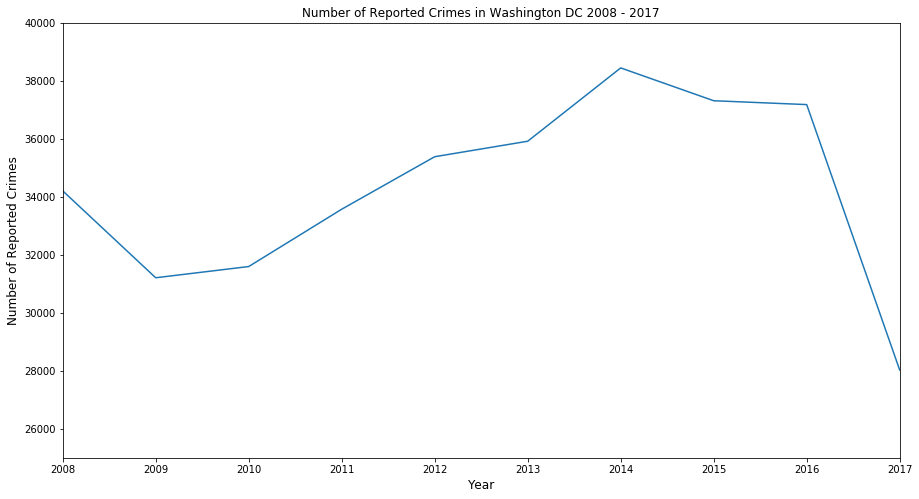

In [6]:
# Start by grouping the crimes by year and summing up the total columns
# Create a dataframe with just the count column; since the columns were summed, the columns will give the total crimes per year
CrimeYears = crime.groupby('year').sum()
CrimeYears= pd.DataFrame(CrimeYears.loc[:,'count'])

# Plot the total crimes by year using a line graph between 2008 - 2017
CrimeYears.plot(legend = False, figsize = (15, 8), title = 'Number of Reported Crimes in Washington DC 2008 - 2017')
plt.ylabel('Number of Reported Crimes', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylim([25000, 40000])
plt.show()

This graph shows that the crime in the Washington DC area has been generally on the rise since 2009. However, crime in 2017 decreased significantly from the previous year; with approximately 10,000 less reports made. 

Crime in DC increased between 2009 and 2015 mainly because the economy had suffered a crash and there were many people with no jobs or homes. This led to increased amounts of crime throughout the city, especially in less properous areas. More recently, the economy has recovered significantly so there are more jobs available. Another reason is that DC is gentrifying at a very fast paced and low income families are being 'pushed out of neighborhoods at some of the highest rates in the country' (The Washington Post).

In [7]:
# Create a dataframe which has the total crime reports per year by quad
# Use the sum() function to add up the total counts and create a dataframe with just the quads, years and total reports
QuadYears = crime.groupby(['quad', 'year']).sum()
QuadYears = pd.DataFrame(QuadYears.loc[:, 'count'])
QuadYears

count
quad      year       
Northeast 2008  18699
          2009  16754
          2010  17025
          2011  18379
          2012  20060
          2013  20301
          2014  22733
          2015  21734
          2016  21989
          2017  16554
Northwest 2008   6994
          2009   6707
          2010   6582
          2011   7180
          2012   6704
          2013   6695
          2014   7024
          2015   7004
          2016   6825
          2017   5058
Southeast 2008   8515
          2009   7749
          2010   7990
          2011   8013
          2012   8619
          2013   8923
          2014   8688
          2015   8576
          2016   8365
          2017   6413
Southwest 2011      2
          2012      2
          2014      3
          2015      2
          2016      4
          2017      2

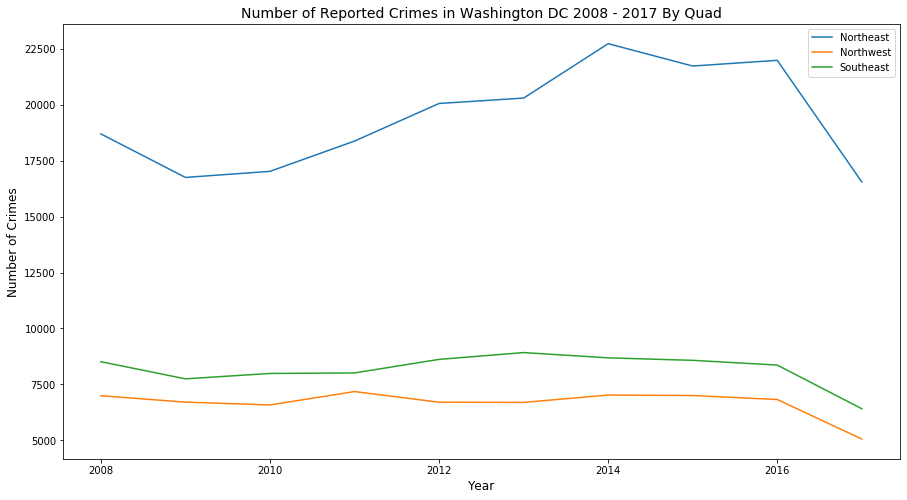

In [8]:
# Create a loop to plot a graph for the crime reports per year for the four quads of DC between 2008 and 2017
quads = ['Northeast', 'Northwest', 'Southeast']

plt.figure(figsize=(15,8))

for q in quads:
    data = QuadYears.loc[q, 'count']
    plt.plot(data.index, data.values, label = q)
    plt.legend(loc = 'best')
    plt.title('Number of Reported Crimes in Washington DC 2008 - 2017 By Quad', fontsize = 14)
    plt.ylabel('Number of Crimes', fontsize = 12)
    plt.xlabel('Year', fontsize = 12)
    
plt.show()

From the dataframe above, it is clear that the data for the Southwest quad is not available; therefore it will not be plotted in the graph as it will be useless. More information can be found on the southwest quarter by using the wards or neighborhoods instead.

The graph shows the number of reported crimes per year in Washington DC by quad from 2008 - 2017. 

Overall, the number of crimes in the Northeast quarter is much higher than the Northwest and Southeast quarter. However, the overall pattern is the same where crime was mostly increasing from 2009 - 2015 and then significantly decreased between 2016 and 2017.

In [9]:
# Create a dataframe which has the total crime reports per year by ward
# Use the sum() function to add up the total counts and create a dataframe with just the wards, years and total reports
WardYears = crime.groupby(['ward', 'year']).sum()
WardYears = pd.DataFrame(WardYears.loc[:, 'count'])
WardYears

count
ward year       
1    2008   4926
     2009   4433
     2010   4358
     2011   4924
     2012   5017
...          ...
8    2013   4431
     2014   4085
     2015   4042
     2016   3893
     2017   2933

[80 rows x 1 columns]

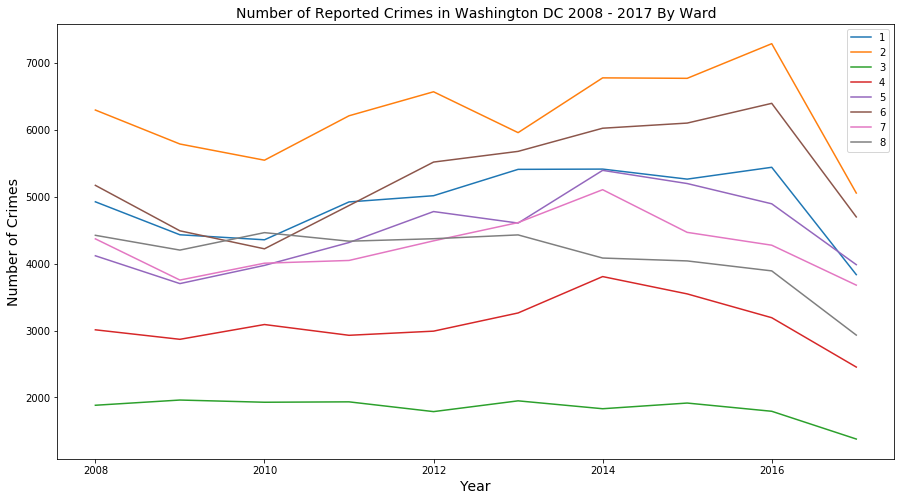

In [10]:
# Create a loop to plot a graph for the crime reports per year for the eight wards of DC between 2008 and 2017
wards = [1,2,3,4,5,6,7,8]

plt.figure(figsize=(15,8))

for w in wards:
    data = WardYears.loc[w, 'count']
    plt.plot(data.index, data.values, label = w)
    plt.legend(loc = 'best')
    plt.title('Number of Reported Crimes in Washington DC 2008 - 2017 By Ward', fontsize = 14)
    plt.ylabel('Number of Crimes', fontsize = 14)
    plt.xlabel('Year', fontsize = 14)
    
plt.show()

The graph shows the number of reported crimes per year in Washington DC by ward from 2008 - 2017. 

Overall, the number of crimes in ward 2 is higher than the other wards, with crime in ward three being the lowest. As expected, the overall pattern is also the same where crime was mostly increasing from 2009 - 2015 and then significantly decreased between 2016 and 2017.

### 3.1 Crime in the different DC neighborhoods over the years

To look at the crime in different neighborhoods, it would be best to create a loop to plot the crime in every neighborhood in Washington DC from 2008 - 2017 and compare them on individual graphs against the overall crime in DC.

In [11]:
# Create a dataframe which has the total crime reports per year by neighborhood
# Use the sum() function to add up the total counts and create a dataframe with just the neighborhoods, years and total reports
Neighborhood = crime.groupby(['cluster', 'year']).sum()
Neighborhood = pd.DataFrame(Neighborhood.loc[:, 'count'])
Neighborhood.head()

count
cluster   year       
Cluster 1 2008    961
          2009    855
          2010    858
          2011   1019
          2012    962

In [12]:
# To compare overall crime to crime in each cluster, first scale total crime by 1/10 so the trends are comparable on the same graph
CrimeYears['count'] = CrimeYears['count']/10

# Create a function to plot graphs for a specified neighborhood to compare with the overall crime rate
# This function will be used to plot neighborhood crime against overall, so the title and axis labels are set accordingly
# Setting the line labels to the pertinent dataset to insert a legend
def plot1(neighborhood):
    data = Neighborhood.loc[neighborhood]
    data2 = CrimeYears.loc[:, 'count']
    plt.plot(data.index, data.values, label = neighborhood, color = 'g')
    plt.plot(data2.index, data2.values, label = 'Overall Crime', color = 'b')
    plt.legend(loc = 'best')
    plt.title('Crime in ' + neighborhood + ' Vs. Overall Crime in DC')
    plt.xlabel('Year', fontsize = 12)
    plt.ylabel('Number of Crimes', fontsize = 12)
    plt.show()

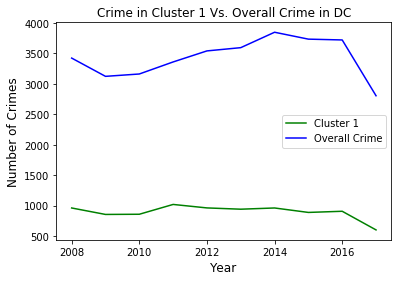

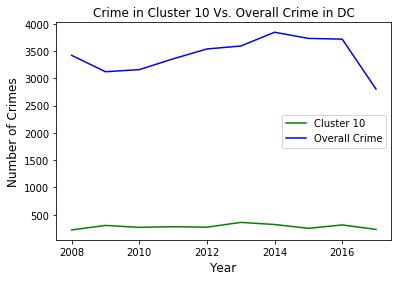

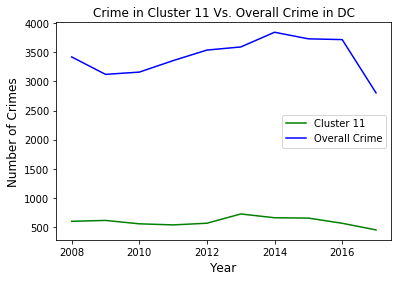

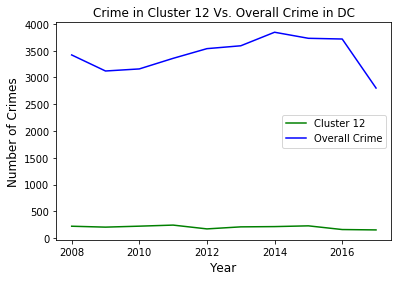

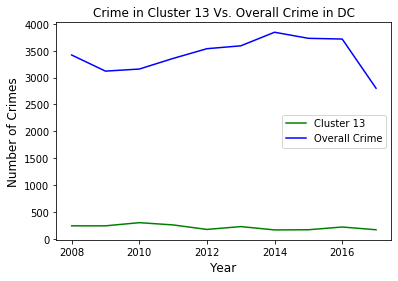

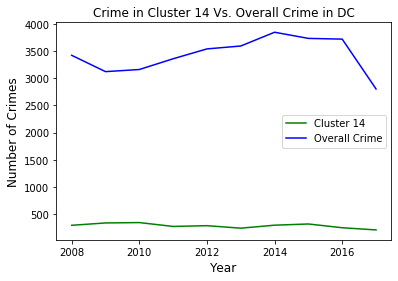

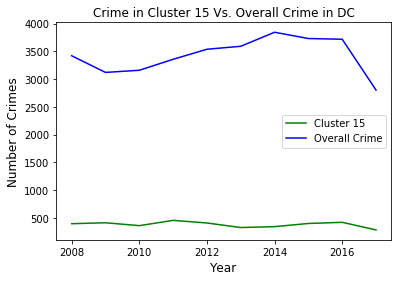

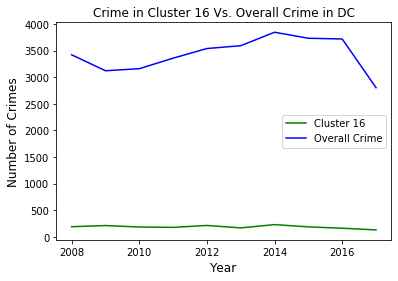

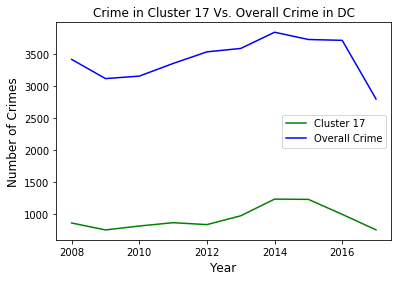

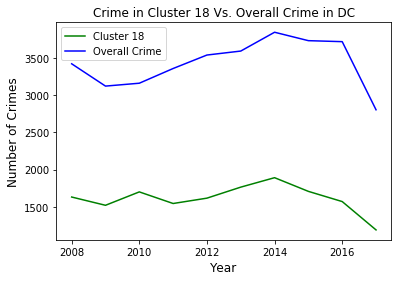

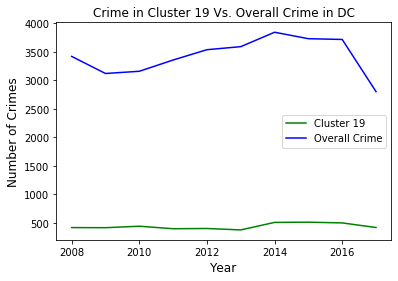

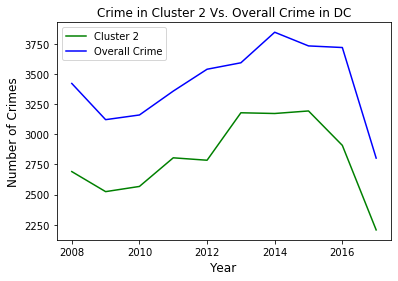

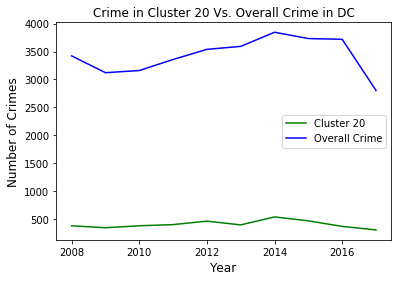

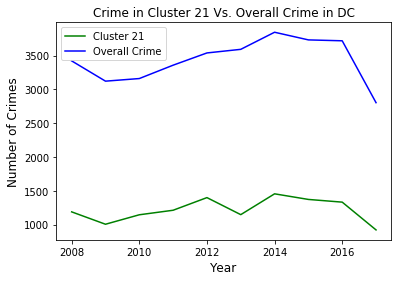

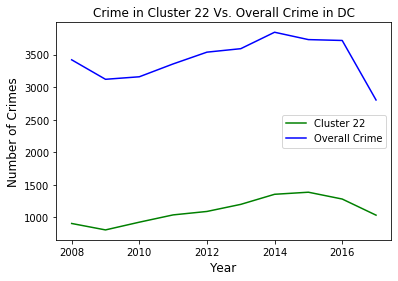

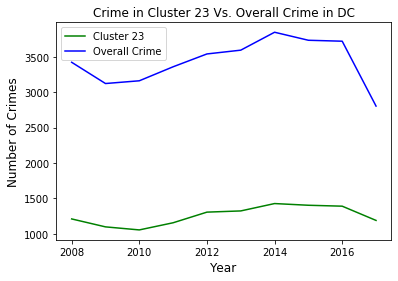

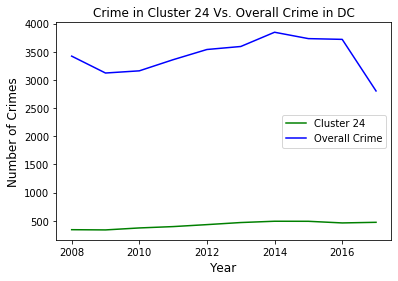

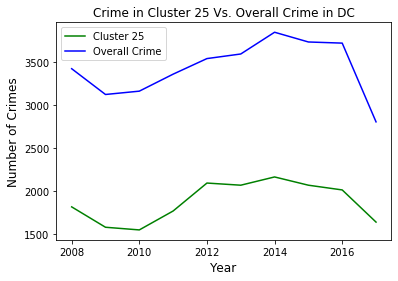

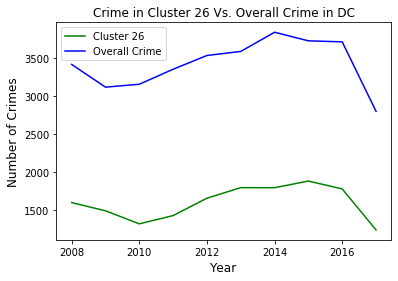

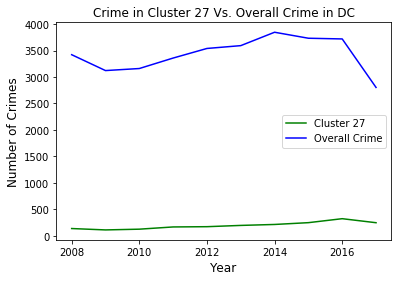

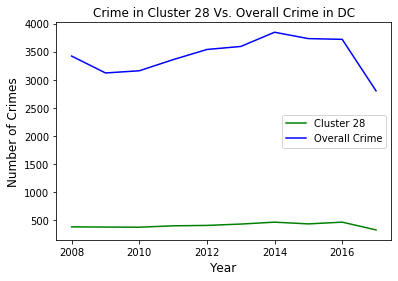

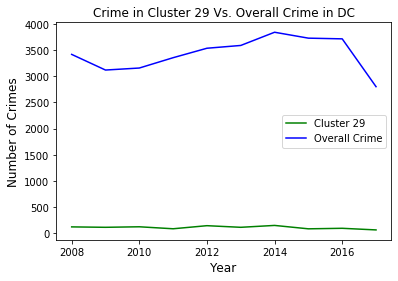

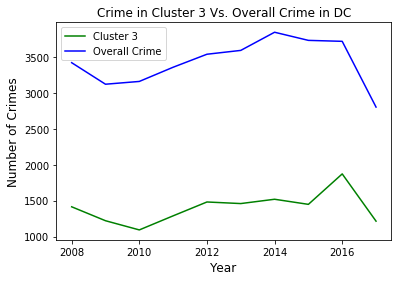

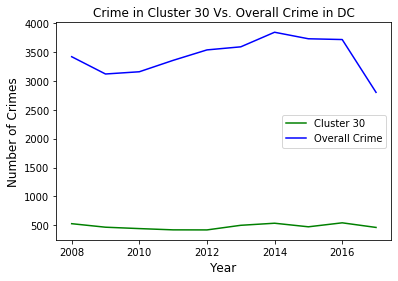

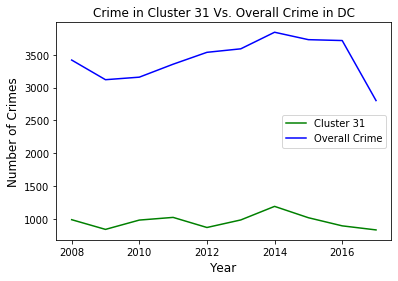

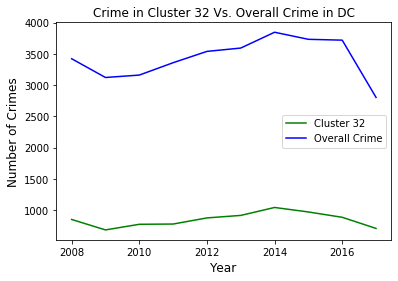

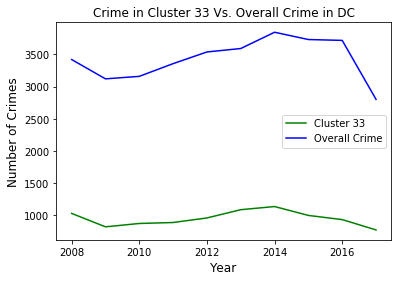

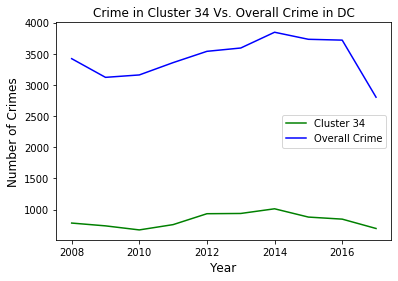

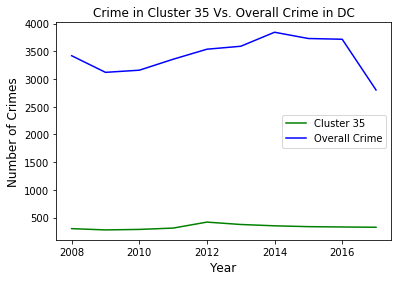

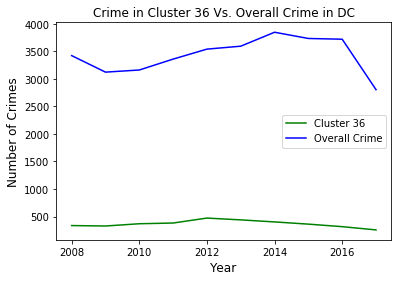

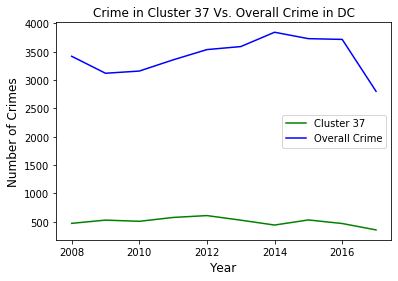

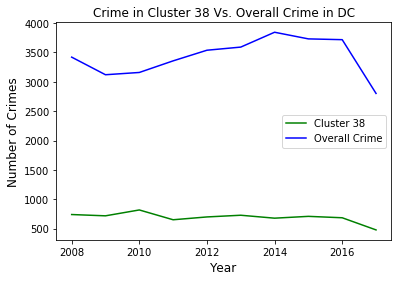

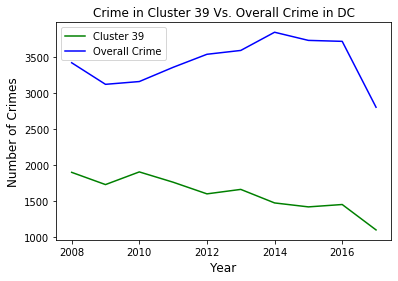

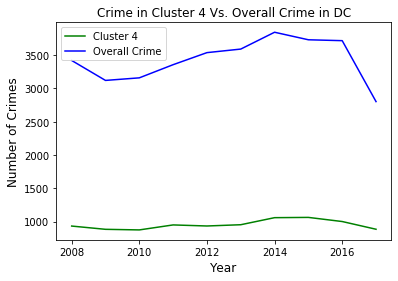

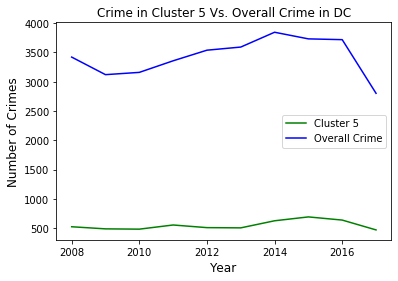

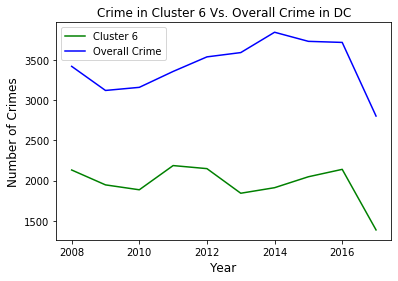

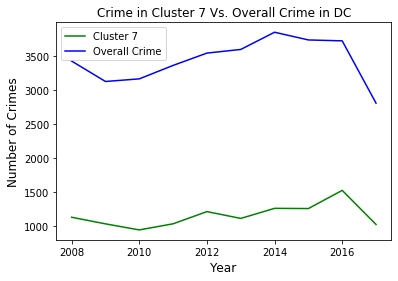

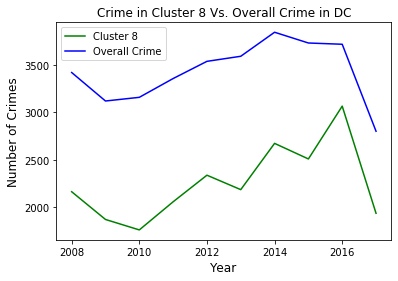

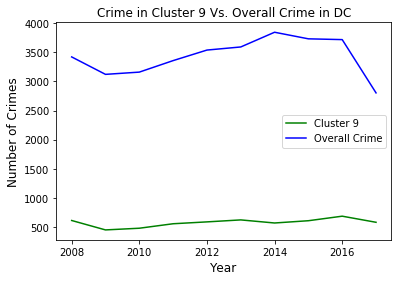

In [13]:
# Create a list of the indexes which are the different clusters and create a loop to plot each cluster against the overall crime rate 
ClusterList = Neighborhood.index.get_level_values(0).unique()

for c in ClusterList:
    plot1(c)

#### 3.1.1 Total Crimes Since 2008 By Neighborhood

To show the total crimes by cluster since 2008, I decided to use a chloropleth map with the folium function. I tried to do this with simple cholopleth maps but I found that coordinates data was needed, which I downloaded from the Open Data DC Website located here: https://opendata.dc.gov/datasets/neighborhood-clusters?geometry=-77.246%2C38.847%2C-76.783%2C38.941.

In [14]:
# Create a dataframe which has the total crime reports by neighborhood since 2008
# Use the sum() function to add up the total counts and create a dataframe with just the neighborhoods and total reports
NeighborhoodTotal = crime.groupby(['cluster']).sum()
NeighborhoodTotal = pd.DataFrame(NeighborhoodTotal.loc[:, 'count'])
NeighborhoodTotal.head()

count
cluster          
Cluster 1    8953
Cluster 10   2824
Cluster 11   5897
Cluster 12   2032
Cluster 13   2161

In [15]:
# Create a duplicate so that if something goes wrong, can always refer to previous dataframe
clustercrime = NeighborhoodTotal

# Reset the index to make the columns easier to call upon when making the chloropleth, then inspect the first few rows
clustercrime.reset_index(inplace = True)
clustercrime.head()

cluster  count
0   Cluster 1   8953
1  Cluster 10   2824
2  Cluster 11   5897
3  Cluster 12   2032
4  Cluster 13   2161

In [16]:
# To create a cholorpleth map, start by importing the required libraries
import folium
import os
import json

# From open data dc, I downloaded the geojson file of washington dc, url:
# https://opendata.dc.gov/datasets/neighborhood-clusters?geometry=-77.246%2C38.847%2C-76.783%2C38.941

# Read the json file into Python which has the coordinates for the clusters
with open('dc2.json') as f:
    clusters=json.load(f)

In [17]:
# Create a chloropleth map of DC showing the total crimes since 2008 by Neighborhood

# Use the folium.Map function to specify the map, where the specified location pertains to DC
dccrime=folium.Map(location=[39,-77], zoom_start=10)

# From the map created, create a cholopleth map with the coordinates data and the crime data which was cleaned earlier
folium.Choropleth(
    geo_data=clusters,
    name='Choropleth',
    data=clustercrime,
    columns=['cluster','count'],
    key_on='feature.properties.NAME',
    fill_color='OrRd', # Specify the color palette using ColorBrewer
    fill_opacity=0.7, # Played around with the fill and line opacity until the nicest looking setting was found
    line_opacity=0.2,
    legend_name='Total Crime Reports Between 2008 and 2017').add_to(dccrime),

# To make the map as simple as possible by removing roads and colors,
# which will avoid any interference with the cholopleth plot
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(dccrime)

# Ensure the chloropleth layer is the top layer
folium.LayerControl().add_to(dccrime)

# Display the map
dccrime

The map shows the total crime reports by cluster from 2008 - 2017.

According to the map, the areas close to central and north DC are the areas which have had the most crime reports. This is probably because the are generally more people and more facilities such as nightclubs; which increase the likelyhood of crimes occuring. As you move out from the center, crime generally decreases, but in some areas there is a significant amount of crime; most probably because of the low-income families being push out to certain neighborhoods because of gentrification.

## 4. Comparing the crime in DC to the GDP of  the United States

In order to compare the crime in DC to the GDP in the United States, the GDP dataset needs to be read and then the desired data needs to be subsetted. After the desired data is left, it will be stacked to make it easy to combine with the crime dataset so that they can be compared on the same graph.

In [18]:
# Import the gdp dataset and set the country name as the index
gdp = pd.read_csv('gdp.csv', index_col = 0)

# Transpose the dataframe so that the years become the index, making it easier to concatenate later
gdp = gdp.transpose()

# Choose just the required years for the united states and scale the values to be able to compare with the crime on the same graph
gdp = gdp.loc['2008' : '2017', 'United States']/1000000000
gdp = pd.DataFrame(gdp)

# Rename the column appropriately, then change the values to numeric
gdp.rename(columns = {'United States' : 'GDP'}, inplace = True)
gdp['GDP'] = pd.to_numeric(gdp['GDP'])
gdp

GDP
2008  14700.0
2009  14400.0
2010  15000.0
2011  15500.0
2012  16200.0
2013  16800.0
2014  17500.0
2015  18200.0
2016  18700.0
2017  19500.0

In [19]:
# Could not concatenate as the indexes were not matching even though they were identical
# Overcame this problem by resetting the indexes from both dataframes first and then concatenating
gdp.reset_index(drop=True, inplace=True)
CrimeYears.reset_index(drop=True, inplace=True)
CrimeGDP = pd.concat( [gdp, CrimeYears], axis=1)
CrimeGDP

GDP   count
0  14700.0  3420.8
1  14400.0  3121.0
2  15000.0  3159.7
3  15500.0  3357.4
4  16200.0  3538.5
5  16800.0  3591.9
6  17500.0  3844.8
7  18200.0  3731.6
8  18700.0  3718.3
9  19500.0  2802.7

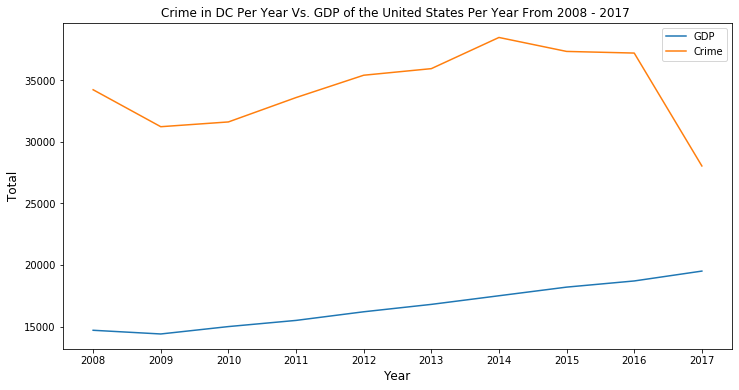

In [20]:
# Change the count values back to normal
CrimeYears['count'] = CrimeYears['count']*10

# Plot the total crimes and gdp by year using a line graph between 2008 - 2017
plt.figure(figsize = (12,6))
plt.plot(gdp, label = 'GDP')
plt.plot(CrimeYears, label = 'Crime')
plt.legend(loc = 'best')
plt.title('Crime in DC Per Year Vs. GDP of the United States Per Year From 2008 - 2017 ')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total', fontsize = 12)

# Since the index was reset, it was much easier to manually label the axis rather than changing the index
# I attempted to mimic the index from the years in the other dataframe but did not have any success
plt.xticks(np.arange(10), ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
plt.show()

The graph shows the total crime reports in Washington DC from 2008 - 2017 and the GDP of the United States in the same time frame. The values of the GDP have been scaled down by 1,000,000,000 so that both datasets can be compared on the same graph.

The graph shows that the GDP of the United States decreased from 2008 to 2009 but has gone up every year since. The crime in DC however, increased between 2009 and 2015. Since then crime has been decreasing, with the numbers decreasing drastically between 2016 and 2017.

Overall, there is almost no correlation between the GDP of the United States and crime rates in Washington DC. I would have personally expected a bit more correlation as GDP goes up, there tends to be more jobs and better income. However, DC is a very small part of the whole country and might be effected by the GDP much at all. More recently, crime has been decreasing but could be due to factors other than the GDP but having a better economy definitely helps. 

## 5. Most common types and methods of crime in DC

To get a picture of the different types of crime in DC; plots will be created to see what percentage of crimes are violent or not, what the most common types of offenses are and the change of the composition of crime in DC between 2008 and 2017. This will show if different types of crime are increasing or decreasing; which can not be deduced from the overall crime rates.

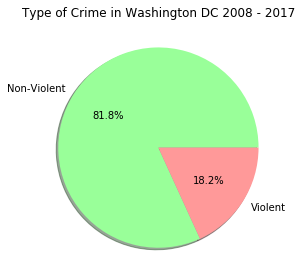

In [21]:
# Group the crimes in DC by type - i.e violent or non-violent
CrimeType = crime.groupby('crimetype').sum()
CrimeType = pd.DataFrame(CrimeType.loc[:, 'count'])

# Create a pie chart to show the breakdown of violent and non violent crimes
CrimeType.plot.pie(subplots = True, labels = ['Non-Violent', 'Violent'], autopct='%.1f%%', colors = ['#99ff99', '#ff9999'], shadow = True, legend = False)
plt.title('Type of Crime in Washington DC 2008 - 2017')
plt.tight_layout()
plt.ylabel(' ')
plt.show()

The pie chart shows the total type of crimes committed between 2008 and 2017 in Washington DC.

It is clear to see that the majority of crimes committed are non violent crimes such as theft. A breakdown of the type of  offense will be investigated later in the analysis.

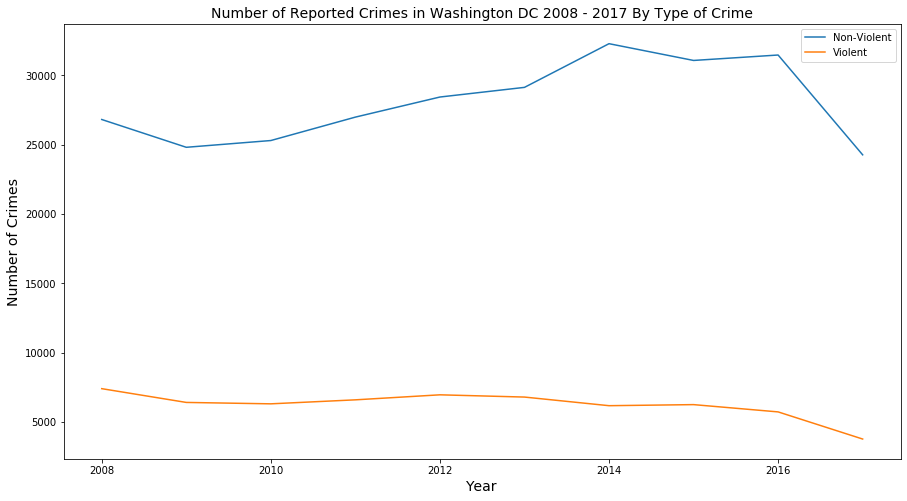

In [20]:
# Group the crimes in DC by type per year and create a dataframe with just the number of reported crimes
CrimeTypeYear= crime.groupby(['crimetype', 'year']).sum()
CrimeTypeYear = pd.DataFrame(CrimeTypeYear.loc[:, 'count'])

# Create a plot to show the voilent and non-violent crimes in DC from 2008 - 2017
plt.figure(figsize=(15,8))

data1 = CrimeTypeYear.loc['Non-Violent', 'count']
data2 = CrimeTypeYear.loc['Violent', 'count']

plt.plot(data1.index, data1.values, label = 'Non-Violent')
plt.plot(data2.index, data2.values, label = 'Violent')
plt.legend(loc = 'best')
plt.title('Number of Reported Crimes in Washington DC 2008 - 2017 By Type of Crime', fontsize = 14)
plt.ylabel('Number of Crimes', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
    
plt.show()

The graph shows the total crimes per year in Washington DC between the years of 2008 - 2017.

From the pie chart above, it was already known that the number of non-violent crimes was larger than the number or violent crimes. This graph shows the trend of both types of crime and it shows that both types of crime are decreasing. However, non-violent crime was decreasing between 2009 and 2014, and hasnt really started to noticeable deacrease until 2017. Violent crime on the other hand has been mostly decreasing since 2008; but since there are less reported crimes, changes will not be as noticeable as non-violent crimes.

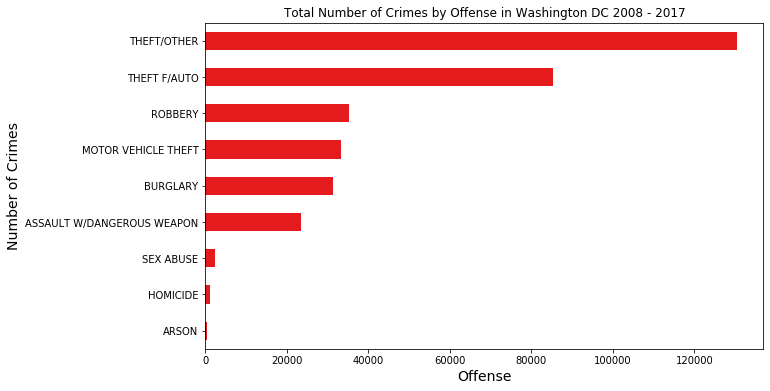

In [21]:
# Group the crimes in DC by the type of offense and then create a dataframe with just the total reported offenses
Offense = crime.groupby('offense').sum()
Offense = pd.DataFrame(Offense.loc[:,'count'])
Offense = Offense.sort_values('count', ascending = True)

# Plot a bar graph showing the total number of reported crimes by offense from 2008 - 2017
Offense.plot.barh(legend = False, figsize = (10,6), cmap = 'Set1', title = 'Total Number of Crimes by Offense in Washington DC 2008 - 2017')
plt.ylabel('Number of Crimes', fontsize = 14)
plt.xlabel('Offense', fontsize = 14)
plt.show()

The graph shows the type of offenses carried out in Washington DC between 2008 - 2017.

From the graph it is clear that the most common type of offense is theft. Theft can come in different forms such as theft from someones vehicle, identity theft or shoplifting. It is also the easiest crime to commit and doesnt have such harsh consequences as if someone committs arson, homicide or sex abuse. A lot of people are also relying on theft in order to survive, as many times they will resell any stolen valuables to try and make a living. 

The result is expected since more than 80% of crimes are non violent, so the majority of offenses will involve non-violent methods such as theft. 

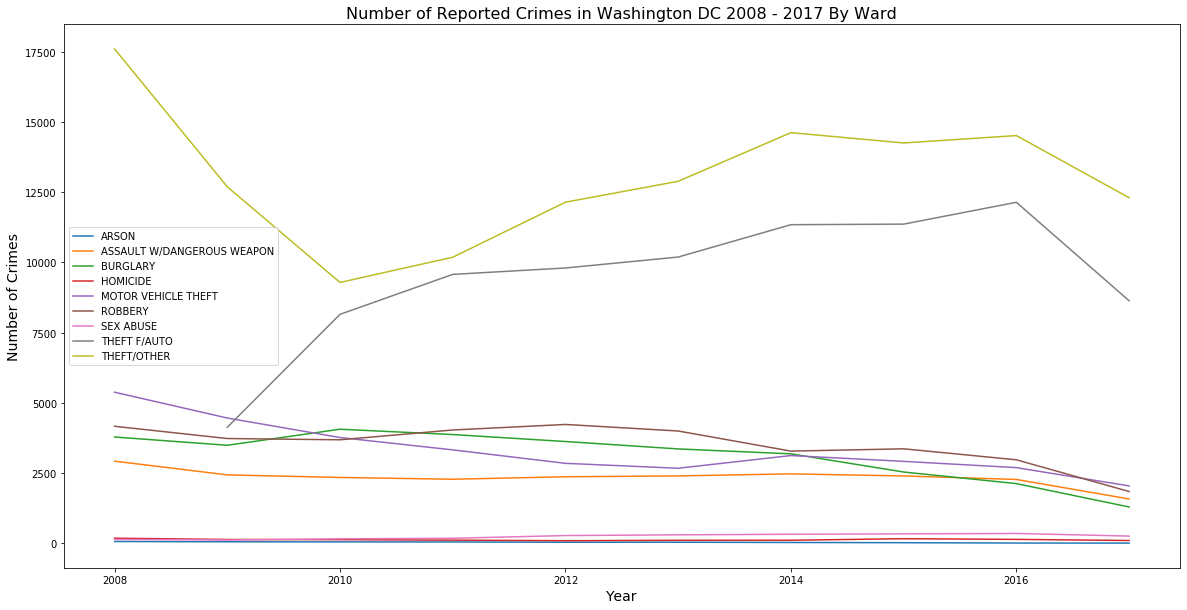

In [22]:
# Create a dataframe which has the type of offense and the year, along with the count
OffenseYear = crime.groupby(['offense','year']).sum()
OffenseYear = pd.DataFrame(OffenseYear.loc[:,'count'])


# Instead of specifying each crime to plot, create a list of the indexes which will be used to plot on the same graph
OffenseList = OffenseYear.index.get_level_values(0).unique()

# Create a plot showing the different types of offense throughout the years
plt.figure(figsize=(20,10))

for o in OffenseList:
    data = OffenseYear.loc[o, 'count']
    plt.plot(data.index, data.values, label = o)
    plt.legend(loc = 'best')
    plt.title('Number of Reported Crimes in Washington DC 2008 - 2017 By Ward', fontsize = 16)
    plt.ylabel('Number of Crimes', fontsize = 14)
    plt.xlabel('Year', fontsize = 14)
    
plt.show()

The graph shows the total reports for different types of offense per year in Washington DC between 2008 - 2017.

Overall, the amount in crime in DC is decreasing for every type of offense, which is a positive sign. However, reports which including theft have been increasing since 2010 and have only started decreasing in 2017. This might be the new trend or it may just be an abnormally low year for theft but continues to go up after 2017. Other offenses have been generally decreasing since 2008.

## 6. When is a crime in DC most likely to occur?

This section will try to find any correlations (if any) between the number of crimes and the month which they occur, which shift most crimes occur in and what day of the month are most prevalent. To do this, plot will be created showing the total number of crimes between 2008 - 2017 which have been reported for the different factors mentioned and try to find any patterns and what may affect the number of crimes.

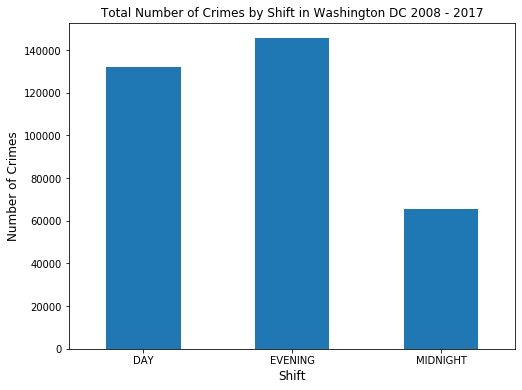

In [23]:
# Start by creating a dataframe with the total count of the different shifts which a crime is reported
Shift = crime.groupby('shift').sum()
Shift = pd.DataFrame(Shift.loc[:,'count'])

# Create a plot showing the total reports made according to shift
Shift.plot(legend = False, kind = 'bar', figsize = (8,6), title = 'Total Number of Crimes by Shift in Washington DC 2008 - 2017')
plt.ylabel('Number of Crimes', fontsize = 12)
plt.xlabel('Shift', fontsize = 12)
plt.xticks(rotation=0)
plt.show()

The graph shows the total crime reports made in Washington DC between 2008 - 2017 according to three different shift patterns for the police.

The graph indicates that the majority of the crimes happen towards the evening shift, with the day shift also having a large percentage of the total reported crimes. The midnight shift appears to be the shift in which the least amount of crimes are reported.

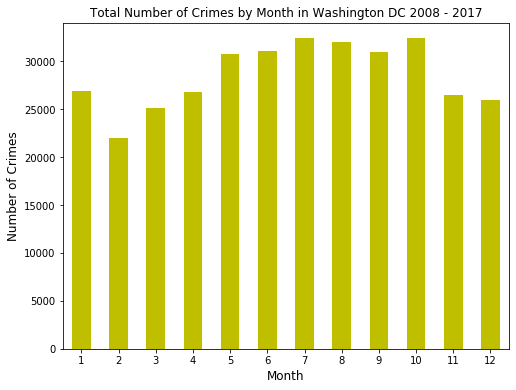

In [24]:
# Create another dataframe which has the total reports made on each month
Month = crime.groupby('month').sum()
Month = pd.DataFrame(Month.loc[:,'count'])

# Create a plot for the total reports made in each month of the year over the 10 years
Month.plot(legend = False, kind = 'bar', figsize = (8,6), title = 'Total Number of Crimes by Month in Washington DC 2008 - 2017', color = 'y')
plt.ylabel('Number of Crimes', fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.xticks(rotation=0)
plt.show()

This graph shows the total reported crimes in Washington DC from 2008 - 2017 for the different months in the year.

The overall crime follows a pattern by where the amount of crime increases as the the temperature increases, with October and July being the months where most crime happens. In January however, there is an increase in crime from the previous months which does not follow the pattern. This is thought to be because a lot of gifts which are received in Christmas are being stolen; such as new Iphones etc. 

In [25]:
# Create a dataframe which has the total reports made according to each day of the month
# Since there will be 31 indexes for each day, it is much easier to show as a list in descending order rather than a bar plotb
Day = crime.groupby('day').sum()
Day = pd.DataFrame(Day.loc[:,'count'])
Day = Day.sort_values('count', ascending = False)
Day

count
day       
23   11946
28   11769
22   11744
21   11686
18   11657
20   11654
24   11644
17   11577
19   11479
26   11455
27   11414
15   11391
16   11300
9    11282
13   11210
25   11178
12   11128
14   11101
8    10997
5    10984
7    10933
10   10913
29   10872
11   10853
6    10801
1    10792
4    10697
30   10644
3    10591
2    10516
31    6659

The list above shows the total number of crime reports in DC between 2008 - 2017. 

The number of reports made in different days of the month is very similar; where the day with most crime is the 23 with 11946 counts and the day with the least crime apart from the 31st, is the 2nd with 10516. Over 10 years, there is a difference of just over 1000 between the highest and lowest crime days. This shows that there is very little to no correlation with the day of the month and crime rates.

The reason why the 31st is so low is because only 7 of the 12 months of the year have 31 days. If the number of reported crimes on the 31st is multiplied by 12/7, the total is 11,415, which is very similar to the other days

## 7. Which areas of DC have had the biggest change in crime since 2008?

Finally, the change in crime since 2008 will be looked at to see which areas of DC have had the biggest decrease or increase in crime over the years.

In [26]:
# Start by inspecting the first few rows of the ward crime by year dataframe
WardYears.head()

count
ward year       
1    2008   4926
     2009   4433
     2010   4358
     2011   4924
     2012   5017

In [27]:
# Calculate the absolute change and percentage change between years using the df.diff() and df.pct_change() functions
WardYears['Change'] = WardYears.diff()
WardYears['Percentage Change'] = (WardYears['count'].pct_change())*100

# Since there is no data for 2007, drop 2008 for all wards as there will be no values
WardYears = WardYears.drop(index = 2008, level = 1)
WardYears.head()

count  Change  Percentage Change
ward year                                  
1    2009   4433  -493.0         -10.008120
     2010   4358   -75.0          -1.691857
     2011   4924   566.0          12.987609
     2012   5017    93.0           1.888708
     2013   5411   394.0           7.853299

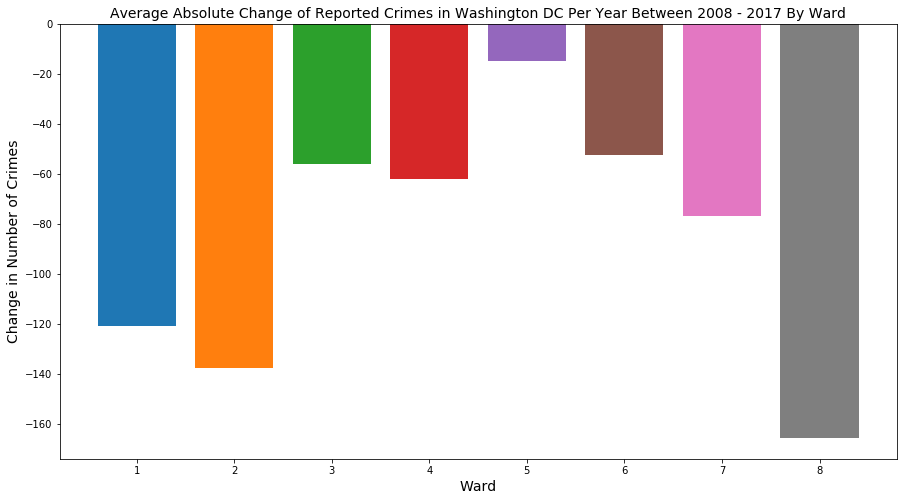

In [28]:
# Import mean from the statistics library to be able to calculate the average
# change per year for each ward between 2008 & 2017 inclusive
from statistics import mean

# Create a loop to plot a graph for the average change in crime reports
# per year for the eight wards of DC between 2008 and 2017
wards = [1,2,3,4,5,6,7,8]

plt.figure(figsize=(15,8))

for w in wards:
    data = WardYears.loc[w, 'Change']
    mean_change_abs = mean(data)
    plt.bar(w, mean_change_abs)
    plt.title('Average Absolute Change of Reported Crimes in Washington DC Per Year Between 2008 - 2017 By Ward', fontsize = 14)
    plt.ylabel('Change in Number of Crimes', fontsize = 14)
    plt.xlabel('Ward', fontsize = 14)
    
plt.show()

The graph shows the average absolute change per year of the total number of reported crimes in each ward in Washington DC between 2008 - 2017.

From the graph, it is clear to see which wards have had the biggest decreases in crime per year on average. Wards 1, 2 and 8 have had the biggest decrease per year on average whilst ward 5 is the ward which the lowest decrease on average.

There are a few factors which may affect how much crime decreases by: Firstly some wards have more crime than others, so wards with more crime tend to have bigger changes that wards with less crime. Washington DC is also gentrifying and low-income families are being pushed out. Crime could be affected by low-income families moving to different wards; which would cause the crime in wards to increase and decrease.

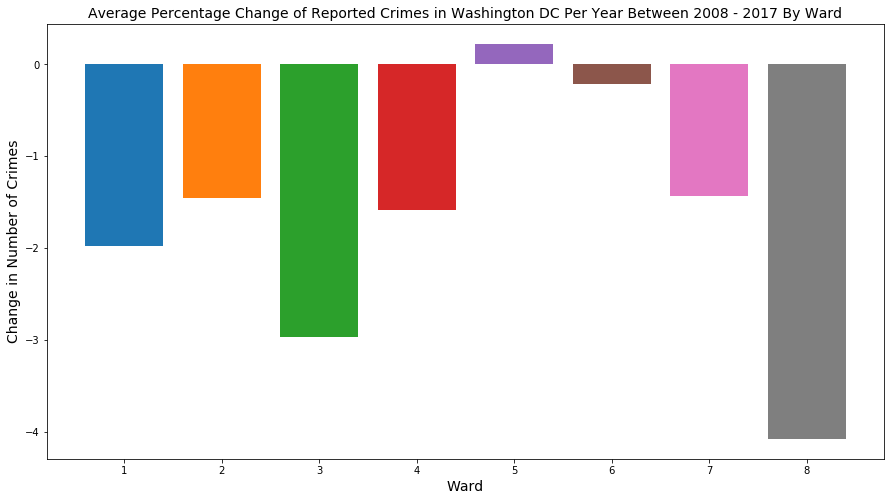

In [29]:
# Create a loop to plot a graph for the average change in crime reports
# per year for the eight wards of DC between 2008 and 2017
wards = [1,2,3,4,5,6,7,8]

plt.figure(figsize=(15,8))

for w in wards:
    data = WardYears.loc[w, 'Percentage Change']
    mean_change_pct = mean(data)
    plt.bar(w, mean_change_pct)
    plt.title('Average Percentage Change of Reported Crimes in Washington DC Per Year Between 2008 - 2017 By Ward', fontsize = 14)
    plt.ylabel('Change in Number of Crimes', fontsize = 14)
    plt.xlabel('Ward', fontsize = 14)
    
plt.show()

The graph shows the average percentage change per year of the total number of reported crimes in each ward in Washington DC between 2008 - 2017.

The results are similar to that of the absolute change, but the percentage change helps give a better indication of which wards have decreasing/increasing crime rates. Wards 1, 3 and 8 are the wards with the biggest decrease on crime in percentage, on average; with ward 8 having the biggest decrease. Surprisingly, ward 5 has had a slight increase each year on average in terms of percentage between 2008 - 2017.

Again, there are a number of factors which could influence how much crime in a certain ward decreases or increases. These factors are the same as mentioned above.


### 7.1 Crime Change By Neighborhood Between 2008 and 2017 In Percentage

To show the percentage crime change by neighborhood between 2008 and 2017, a chloropleth map was plotted again with the folium function. For the next maps I decided to add more functionality by displaying the neighborhood name when hovered over.

In [30]:
# Start by inspecting the first few rows of the neighborhood crime by year dataframe
Neighborhood.head()

count
cluster   year       
Cluster 1 2008    961
          2009    855
          2010    858
          2011   1019
          2012    962

In [31]:
# To look at the percentage change between 2008 and 2017 in crime by neighborhood,
# start by dropping the years in between 2008 and 2017
Neighborhood1 = Neighborhood.drop(index = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], level = 1)

# Calculate the absolute change and percentage change between years using the df.diff() and df.pct_change() functions
Neighborhood1['Percentage Change'] = (Neighborhood1['count'].pct_change())*100

# Drop the values for 2008 as all that is needed is the change at 2017
Neighborhood1 = Neighborhood1.drop(index = 2008, level = 1)
Neighborhood1 = Neighborhood1.sort_values('Percentage Change')

Neighborhood1.head()

count  Percentage Change
cluster    year                          
Cluster 29 2017     60         -49.152542
Cluster 39 2017   1098         -42.149631
Cluster 1  2017    601         -37.460978
Cluster 38 2017    478         -35.405405
Cluster 6  2017   1387         -34.943715

In [32]:
# Create a duplicate so that if something goes wrong, can always refer to previous dataframe
clusterdata = Neighborhood1

# Reset the index to make the columns easier to call upon when making the chloropleth, then inspect the first few rows
clusterdata.reset_index(inplace = True)
clusterdata.head()

cluster  year  count  Percentage Change
0  Cluster 29  2017     60         -49.152542
1  Cluster 39  2017   1098         -42.149631
2   Cluster 1  2017    601         -37.460978
3  Cluster 38  2017    478         -35.405405
4   Cluster 6  2017   1387         -34.943715

In [33]:
# Create a chloropleth map of DC showing the percentage change of crimes,
# Between 2008 and 2017 by neighborhood

# Use the folium.Map function to specify the map, where the specified location pertains to DC
dcmap=folium.Map(location=[39,-77], zoom_start=10)

# From the map created, create a cholopleth map with the coordinates data and the crime data which was cleaned earlier
folium.Choropleth(
    geo_data=clusters,
    name='Choropleth',
    data=clusterdata,
    columns=['cluster','Percentage Change'],
    key_on='feature.properties.NAME',
    fill_color='YlGnBu', # Specify the color palette using ColorBrewer
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Change in Crime From 2008 to 2017 in %').add_to(dcmap),

# To make the map as simple as possible by removing roads and colors,
# which will avoid any interference with the cholopleth plot
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(dcmap)

# Ensure the chloropleth layer is the top layer
folium.LayerControl().add_to(dcmap)


# For these maps, an interactive feature will be used which will display the neighborhood name
# when the mouse is placed of any neighborhood

# Start by specifying the style function, which determines the outline color
# and fill color, which was experimented with until the map looked nice
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

# The highlight function is the style of the pop up when a certain neighborhood is highlighted
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

# Insert the highlighting interactive function to the map using features.GeoJson funcion within folium
info = folium.features.GeoJson(
    clusters, 
    control=False,
    style_function = style_function,
    highlight_function = highlight_function,
    
    # Specify the information to be shown when certain neighborhoods are hovered over
    tooltip=folium.features.GeoJsonTooltip(
        fields=['NBH_NAMES'],
        aliases=['Neighborhood'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)

# Add this function to the map, and also ensure the information pops up infront of the map
dcmap.add_child(info)
dcmap.keep_in_front(info)

dcmap

The map shows the percentage change in crime reports from 2008 - 2017 for each neighborhood in DC.

According to the map, the areas which have had the biggest rise in crime in 2017 compared to 2008 are Navy Yard and Fort Lincoln. Navy Yard is a very gentrified area with a lot of clubs and bars etc, but there are still low income families. This means there is increased liklihood of crime. Whereas Fort Lincoln has a lot of low-income families as they are being pushed out by gentrification.

Overall, a large majority of neighborhoods have had a decrease in crime in 2017 compared to 2008; with some neighboorhoods having more than a 40% decrease. This is a sign that things are heading in the right direction for crime in DC. 

### 7.2 Crime Change By Neighborhood Between 2016 and 2017 In Percentage

To show the percentage change in crime between 2016 and 2017 by neighborhood, the same method was used as above, with minor changes to show the correct data.

In [34]:
# To look at the percentage change between 2016 and 2017 in crime by neighborhood,
# start by dropping the years before 2008 and 2017
Neighborhood2 = Neighborhood.drop(index = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], level = 1)

# Calculate the absolute change and percentage change between years using the df.diff() and df.pct_change() functions
Neighborhood2['Percentage Change'] = (Neighborhood2['count'].pct_change())*100

# Drop the values for 2016 as all that is needed is the change at 2017
Neighborhood2 = Neighborhood2.drop(index = 2016, level = 1)
Neighborhood2 = Neighborhood2.sort_values('Percentage Change')

Neighborhood2.head()

count  Percentage Change
cluster    year                          
Cluster 8  2017   1939         -36.778611
Cluster 6  2017   1387         -35.186916
Cluster 3  2017   1214         -35.149573
Cluster 29 2017     60         -34.065934
Cluster 1  2017    601         -33.737596

In [35]:
# Create a duplicate so that if something goes wrong, can always refer to previous dataframe
clusterdata2 = Neighborhood2

# Reset the index to make the columns easier to call upon when making the chloropleth, then inspect the first few rows
clusterdata2.reset_index(inplace = True)
clusterdata2.head()

cluster  year  count  Percentage Change
0   Cluster 8  2017   1939         -36.778611
1   Cluster 6  2017   1387         -35.186916
2   Cluster 3  2017   1214         -35.149573
3  Cluster 29  2017     60         -34.065934
4   Cluster 1  2017    601         -33.737596

In [36]:
# To plot a choloropleth for the change between 2016 and 2017 in percentage,
# the same code was used as the previous map, with minor changes to the dataframe used,
# the columns specified and titles.

# The main code for the plotting remains mainly the same

dcmap2=folium.Map(location=[39,-77], zoom_start=10)
folium.Choropleth(
    geo_data=clusters,
    name='Choropleth',
    data=clusterdata2,
    columns=['cluster','Percentage Change'],
    key_on='feature.properties.NAME',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Change in Crime From 2016 to 2017 in %').add_to(dcmap2),

folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(dcmap2)
folium.LayerControl().add_to(dcmap2)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

info = folium.features.GeoJson(
    clusters, 
    control=False,
    style_function = style_function,
    highlight_function = highlight_function,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['NBH_NAMES'],
        aliases=['Neighborhood'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
dcmap2.add_child(info)
dcmap2.keep_in_front(info)

dcmap2

The map shows the percentage change in crime reports from 2016 - 2017 for each neighborhood in DC.

According to the map, the areas which have had the biggest rise in crime in 2017 compared to 2016 are Fairfax Village and Fort Lincoln. Even though there is an increase which is worrying, fortunately none of these increases have been by more than 2% from the previous year. Neighborhoods like Navy Yard - which has had an almost 80% increase compared to 2008, has actually had a decrease in crime from 2016.

Overall, a large majority of neighborhoods have had a decrease in crime in 2017 compared to 2016; with some neighboorhoods having more than a 40% decrease. With the biggest increase being less than 2%, it shows than crime has started to significantly decrease; at least for one year.

## 8. Predictions

From the data gathered and the graphs plotted, there are clear patterns which can be observed. These patterns do not just show what is happening or what has happened; they also serve as an indicator for the future, allowing for predictions to be made based on these patterns.

Overall, the crime between 2008 and 2017 has actually been going up, but since there was such a significant decrease between 2016 and 2017, it seems that the trend has been turning and crime will start decreasing. On average however, crime has been decreasing since 2008; even though crime went up more years than it went down, it went down by a lot more than it went up. This is why many wards have a percentage decrease on average. I think crime will keep going down in general as DC keeps gentrifying and new initiatives are put in place.

When taking into account the types of crime and different offsenses, it appears that all types of crime are decreasing and will continue to decrease. Non-violent crimes will decrease at a greater rate than violent crimes because there are more non-violent crimes; so it is easier for bigger changes to occur. Non-violent crimes are also easier to address than violent crimes, which will also cause a big decreases. Non-violent offenses such as theft will decrease at a faster rate than violent crimes such as homicide as they are easier to prevent. 

Even though it was shown that GDP and crime in DC are not correlated, I believe that eventually a high GDP will cause crime in DC and all over the USA to decrease as this leads to better infrustrucure and more public investment.

The Federal Bureau of Investigation (FBI) also recently released the 2018 Crime in the United States annual report. This report shows that Washington, DC overall crime in 2018 has continued to decline. Mayor Muriel Bowser also recently launched the 2019 Safer Stronger DC Fall Crime Prevention Initiative, a collaborative program with the Metropolitan Police Department in place to reduce crime, using strategic prevention and focused enforcement in particular clusters throughout the District.

Overall, taking into account the trends and new commitments by people in power, I think that crime in DC will continue to decrease overall, but some neighborhood will experience slight rises in crime.

## 9. Conclusion

From the data gathered and plots created, there are a few conclusions which can be made.

In general, crime has been rising since 2008 each year apart from a few years; but most importantly crime has been decreasing at a significant rate recently. On average however, the crime for each ward has been decreasing in numbers each year and decreasing in all by one ward in percentage since 2008.

It is also clear that non-violent crimes are much more prevalent than violent crimes, theft is the most common type of offense in DC and more violent crimes such as homicide and sex assault are not nearly as common.

As expected, the months which are warmer tend to have larger numbers of crime reports and the evening shift experiences the most crime reports. When it comes to a certain day of the month, there is no correlation between the day of the month and number of crime reports.

Overall, crime has been decreasing most recently and will probably continue to decline for a number of factors which will speed up this decline.

## Bibliography & Websites

Crime in DC  Throughout the Years - https://apps.urban.org/features/OurChangingCity/dc-public-safety/

Gentrification in D.C - https://www.washingtonpost.com/local/in-the-district-gentrification-means-widespread-displacement-report-says/2019/04/26/950a0c00-6775-11e9-8985-4cf30147bdca_story.html

Open Data DC - https://opendata.dc.gov/datasets/neighborhood-clusters?geometry=-77.246%2C38.847%2C-76.783%2C38.941

Crack’s Rapid Rise Brought Chaos To D.C. - https://wamu.org/story/14/01/27/crack_1/

FBI Crime Stats: See Where DC Stands - https://patch.com/district-columbia/washingtondc/fbi-crime-stats-see-where-dc-stands

2019 Fall Crime Prevention Initiative - https://dc.gov/release/mayor-bowser-launches-2019-fall-crime-prevention-initiative